In [4]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

In [5]:
color_raw = o3d.io.read_image('image_color.png')
depth_raw = o3d.io.read_image('image_gray.png')
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw)
print(rgbd_image)

RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


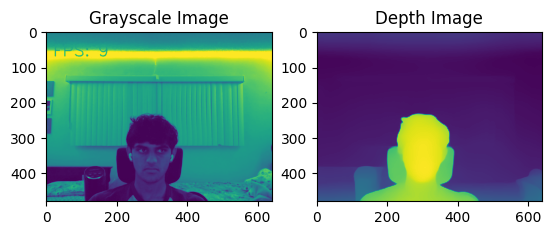

In [6]:
plt.subplot(1, 2, 1)
plt.title('Grayscale Image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Depth Image')
plt.imshow(rgbd_image.depth)
plt.show()

In [7]:
camera_intrinsic = o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)

In [12]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, camera_intrinsic)

pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

In [18]:
o3d.io.write_point_cloud('test.ply', pcd, format='auto', write_ascii=False)

True